In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# convert to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# convert the string representation of list to actual list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
import seaborn as sns

In [10]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

top_10_pay = df_DA_US_exploded.sort_values(by='median', ascending=False).head(10)

top_10_demand = df_DA_US_exploded.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

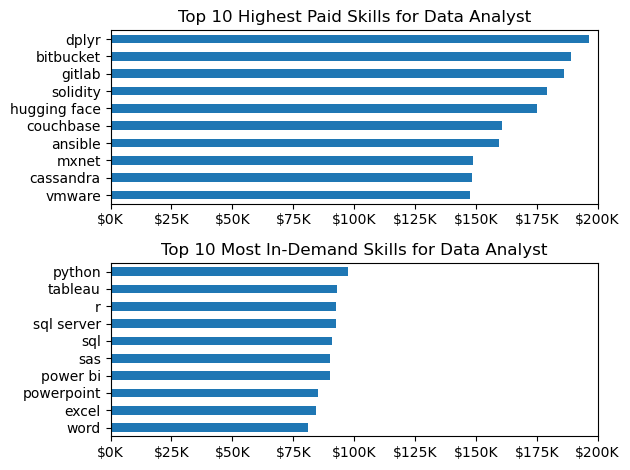

In [11]:
fig, ax = plt.subplots(2, 1)

dict_to_view = {
  'Top 10 Highest Paid Skills for Data Analyst' : top_10_pay,
  'Top 10 Most In-Demand Skills for Data Analyst' : top_10_demand
  }
for i, (title, col) in enumerate(dict_to_view.items()):
  col.plot(kind='barh', y='median', legend='', ax=ax[i], title=title)
  ax[i].set_ylabel('')
  ax[i].invert_yaxis()
  ax[i].set_xlim(0, 200_000)
  # ax[1].set_xlim(ax[0].get_xlim())
  ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
  
fig.tight_layout()

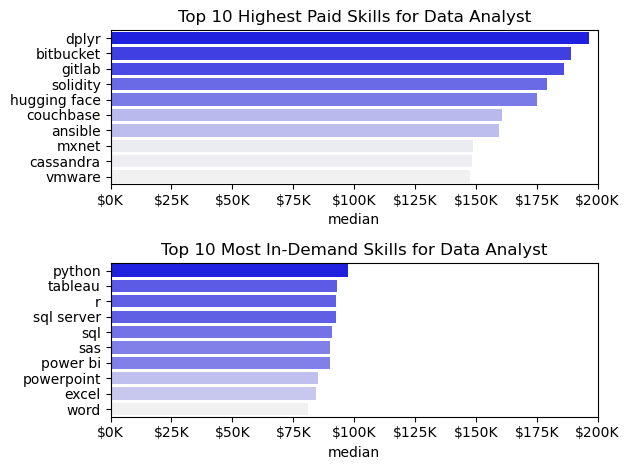

In [27]:
fig, ax = plt.subplots(2, 1)

dict_to_view = {
  'Top 10 Highest Paid Skills for Data Analyst' : top_10_pay,
  'Top 10 Most In-Demand Skills for Data Analyst' : top_10_demand
  }
for i, (title, col) in enumerate(dict_to_view.items()):
  # col.plot(kind='barh', y='median', legend='', ax=ax[i], title=title)
  sns.barplot(data=col, x='median', y=col.index, ax=ax[i], hue='median', legend='', palette='light:b')
  ax[i].set_title(title)
  ax[i].set_ylabel('')
  # ax[i].invert_yaxis()
  ax[i].set_xlim(0, 200_000)
  # ax[1].set_xlim(ax[0].get_xlim())
  ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
  
fig.tight_layout()

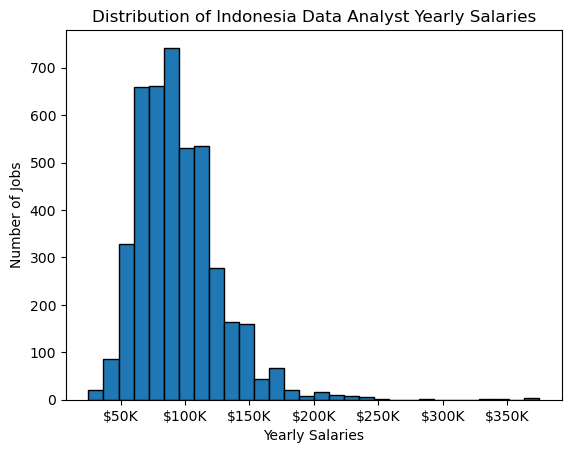

In [28]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
# plt.xlim(0, 120000)

ax = plt.gca()

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.title("Distribution of Indonesia Data Analyst Yearly Salaries")
plt.ylabel("Number of Jobs")
plt.xlabel("Yearly Salaries")
plt.show()

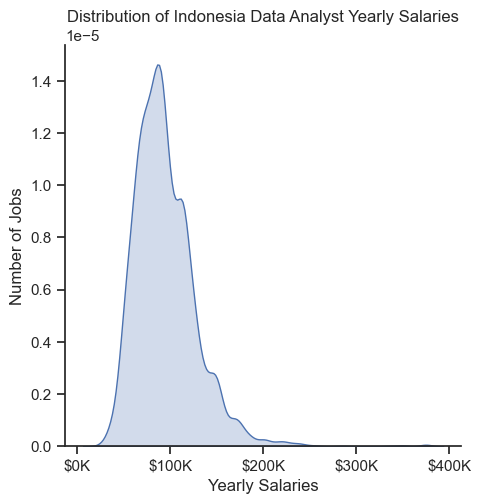

In [34]:
sns.set_theme(style='ticks')
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)

ax = plt.gca()

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.title("Distribution of Indonesia Data Analyst Yearly Salaries")
plt.ylabel("Number of Jobs")
plt.xlabel("Yearly Salaries")
plt.show()

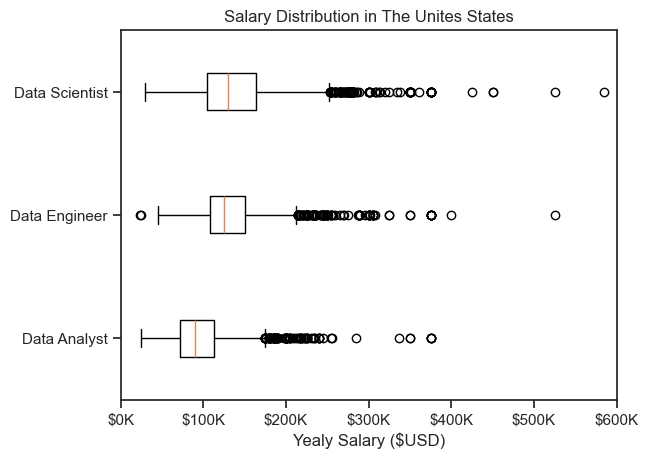

In [35]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter data to appropriate job_titles
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == "United States")].copy()

# remove NaN values
df_US = df_US.dropna(subset='salary_year_avg')

jobs_lists = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(jobs_lists, tick_labels=job_titles, vert=False)
plt.title('Salary Distribution in The Unites States')
plt.xlabel('Yealy Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

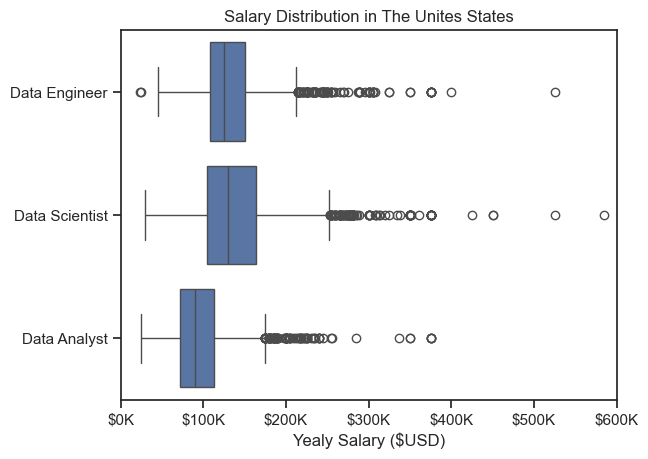

In [38]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distribution in The Unites States')
plt.xlabel('Yealy Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()